**Importar las librerias y/o paquetes necesarios para el proceso de ML**

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Autentificación para poder acceder a los archivos almacenados en Google Drive**

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**Abrir el csv y se almacenarlo en un dataframe**

In [ ]:
df = pd.DataFrame()

def _loadCsv():
  global df
  id = '1vPVmPr3-VP7xc8GkC5UvwRJG8Vhtv8BK'
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('heart900.csv')
  df = pd.read_csv('heart900.csv')

_loadCsv()

print(df.shape)

(918, 12)


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
print('El archivo tiene el siguiente número de filas y columnas:', df.shape)
print('Las columnas son:', df.columns)
print ('Tiene valores NAN:', df.isnull().values.any())
print(df)

El archivo tiene el siguiente número de filas y columnas: (918, 12)
Las columnas son: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
Tiene valores NAN: False
     Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
0     40   M           ATA  ...      0.0        Up             0
1     49   F           NAP  ...      1.0      Flat             1
2     37   M           ATA  ...      0.0        Up             0
3     48   F           ASY  ...      1.5      Flat             1
4     54   M           NAP  ...      0.0        Up             0
..   ...  ..           ...  ...      ...       ...           ...
913   45   M            TA  ...      1.2      Flat             1
914   68   M           ASY  ...      3.4      Flat             1
915   57   M           ASY  ...      1.2      Flat             1
916   57   F           ATA  ...      0.0   

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Algoritmos**

In [ ]:
def createCholesterolRange(x):
  if x < 200:
    return 1
  elif (x >= 200 and x < 240):
    return 2
  else:
    return 3

def createRestingBPRange(x):
  if x < 120:
    return 1
  elif (x >= 120 and x < 229):
    return 2
  else:
    return 3

def createMaxHRRange(x):
  if x < 100:
    return 1
  else:
    return 2


df['Cholesterol'] = df['Cholesterol'].apply(createCholesterolRange)
df['RestingBP'] = df['RestingBP'].apply(createRestingBPRange)
df['MaxHR'] = df['MaxHR'].apply(createMaxHRRange)

df = pd.get_dummies(df)
print('El archivo tiene el siguiente número de filas y columnas:', df.shape)
print('Las columnas son:', df.columns)

El archivo tiene el siguiente número de filas y columnas: (918, 21)
Las columnas son: Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')


In [ ]:
df = df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up', 'HeartDisease']]
check_for_nan = df.isnull().values.any()
print (check_for_nan)
df.head()

False


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,2,3,0,2,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
1,49,2,1,0,2,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1
2,37,2,3,0,1,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0
3,48,2,2,0,2,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1
4,54,2,1,0,2,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0


In [ ]:
X = df.drop(columns = 'HeartDisease').values
y = df.HeartDisease

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2)

print('Length of train dataset', X_train.shape)
print('Length of validation dataset', X_validation.shape)
print('Length of test dataset', X_test.shape)

Length of train dataset (587, 20)
Length of validation dataset (184, 20)
Length of test dataset (147, 20)


**Entrenamiento de los modelos**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC_model = RandomForestClassifier()
RFC_model.fit(X_train, y_train.ravel())
predict = RFC_model.predict(X_validation)
print("\nRandomForestClassifier")
print(RFC_model.score(X_validation, y_validation))
print(metrics.confusion_matrix(y_validation, predict))
print("Accuracy RF = {0:.3f}".format(metrics.accuracy_score(y_validation, predict)))
print("Precision RF = {0:.3f}".format(metrics.precision_score(y_validation, predict)))
print("Recall RF = {0:.3f}".format(metrics.recall_score(y_validation, predict)))
print("F1 = {0:.3f}".format(metrics.f1_score(y_validation, predict)))
print("Sumary")
print(metrics.classification_report(y_validation, predict))

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(X_train, y_train.ravel())
predict = clf.predict(X_validation)
print("\nMLPClassifier")
print(clf.score(X_validation, y_validation))
print(metrics.confusion_matrix(y_validation, predict))
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_validation, predict)))
print("Precision = {0:.3f}".format(metrics.precision_score(y_validation, predict)))
print("Recall = {0:.3f}".format(metrics.recall_score(y_validation, predict)))
print("F1 = {0:.3f}".format(metrics.f1_score(y_validation, predict)))
print("Sumary")
print(metrics.classification_report(y_validation, predict))


RandomForestClassifier
0.8532608695652174
[[69 18]
 [ 9 88]]
Accuracy RF = 0.853
Precision RF = 0.830
Recall RF = 0.907
F1 = 0.867
Sumary
              precision    recall  f1-score   support

           0       0.88      0.79      0.84        87
           1       0.83      0.91      0.87        97

    accuracy                           0.85       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184


MLPClassifier
0.8804347826086957
[[71 16]
 [ 6 91]]
Accuracy = 0.880
Precision = 0.850
Recall = 0.938
F1 = 0.892
Sumary
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        87
           1       0.85      0.94      0.89        97

    accuracy                           0.88       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



**Test**


RandomForestClassifier
[[50 15]
 [13 69]]
Accuracy RF = 0.810
Precision RF = 0.821
Recall RF = 0.841
F1 = 0.831

MLPClassifier
[[51 14]
 [ 4 78]]
Accuracy = 0.878
Precision = 0.848
Recall = 0.951
F1 = 0.897


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


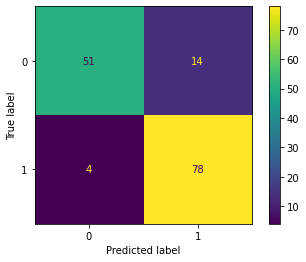

In [ ]:
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
predict = RFC_model.predict(X_test)
print("\nRandomForestClassifier")
print(metrics.confusion_matrix(y_test, predict))
print("Accuracy RF = {0:.3f}".format(metrics.accuracy_score(y_test, predict)))
print("Precision RF = {0:.3f}".format(metrics.precision_score(y_test, predict)))
print("Recall RF = {0:.3f}".format(metrics.recall_score(y_test, predict)))
print("F1 = {0:.3f}".format(metrics.f1_score(y_test, predict)))

predict = clf.predict(X_test)
print("\nMLPClassifier")
print(metrics.confusion_matrix(y_test, predict))
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict)))
print("Precision = {0:.3f}".format(metrics.precision_score(y_test, predict)))
print("Recall = {0:.3f}".format(metrics.recall_score(y_test, predict)))
print("F1 = {0:.3f}".format(metrics.f1_score(y_test, predict)))

plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  

In [ ]:
#'''
import joblib 
from google.colab import files

joblib.dump(RFC_model, 'RFC_model_trained.pkl')
joblib.dump(clf, 'clf_model_trained.pkl')

files.download('RFC_model_trained.pkl')
files.download('clf_model_trained.pkl')

df.to_csv('preprosessed_dataset.csv')
files.download('preprosessed_dataset.csv')

pd.DataFrame(X_train).to_csv('X_train.csv') 
files.download('X_train.csv')

pd.DataFrame(y_train).to_csv('y_train.csv') 
files.download('y_train.csv')

pd.DataFrame(X_validation).to_csv('X_validation.csv') 
files.download('X_validation.csv')

pd.DataFrame(y_validation).to_csv('y_validation.csv') 
files.download('y_validation.csv')

pd.DataFrame(X_test).to_csv('X_test.csv') 
files.download('X_test.csv')

pd.DataFrame(y_test).to_csv('y_test.csv') 
files.download('y_test.csv')
#'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#275 = 0
p = clf.predict([[59, 2, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1]])
print(p)

#631 = 1
p = clf.predict([[46, 2, 3, 0, 2, 1.8, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0]])
print(p)

#654 = 0
p = clf.predict([[48, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1]])
print(p)

#375 = 1
p = clf.predict([[73, 2, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1]])
print(p)

#22 = 0
p = clf.predict([[49, 2, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1]])
print(p)

#388 = 1
p = clf.predict([[55, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0]])
print(p)

#753 = 0
p = clf.predict([[34, 1, 2, 0, 2, 0.7, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1]])
print(p)

#232 = 0
p = clf.predict([[38, 2, 3, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1]])
print(p)

#4 = 0
p = clf.predict([[54, 2, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1]])
print(p)

#56 = 1
p = clf.predict([[31, 2, 3, 0, 2, 1.5, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0]])
print(p)

[0]
[1]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
